#### Load packages

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import os, glob
os.getcwd()

'/mnt/home/ayamaguchi'

In [37]:
cd '/mnt/home/ayamaguchi/'

/mnt/home/ayamaguchi


In [38]:
# os.listdir()
from scripts.function_files import mic_pos_f as mf
from scripts.function_files import mic_arrays as ma

In [91]:
# fnames = glob.glob('/mnt/home/ayamaguchi/output_warble/out_wbl5/*.npy')
# fnames = glob.glob('/mnt/home/ayamaguchi/output_sym/out_sym_vert/*.npy')
# fnames = glob.glob('/mnt/home/ayamaguchi/output_sym/out_sym_diag/*.npy')
# fnames = glob.glob('/mnt/home/ayamaguchi/output_sym/out_sym_rot/*.npy')
# fnames = glob.glob('/mnt/home/ayamaguchi/output_sym/*.npy')
# fnames = glob.glob('/mnt/home/ayamaguchi/output/out_small_wall/*.npy')
# fnames = glob.glob('/mnt/home/ayamaguchi/output_sym/out_sym_sml_diag/*.npy')
fnames = glob.glob('/mnt/home/ayamaguchi/output/small_rev_jk_ceiling_vert/*.npy')

In [92]:
len(fnames)
# fnames[0]

4

In [93]:
data = np.load(fnames[0],allow_pickle=True)
data.shape

(1536, 3)

In [94]:
data[:,0].shape

(1536,)

In [100]:
# data[0,1] # mic_pos
# data[0,2] # src_idx
data[0,0] # error

0.13483238981790313

In [78]:
data[2]

array([0.23933895873553535, array([[0.012, 0.2  , 0.388, 0.2  ],
                                   [0.3  , 0.582, 0.3  , 0.018],
                                   [0.345, 0.345, 0.345, 0.345]]), (0, 2)],
      dtype=object)

In [24]:
merr = 10
Nall_idx = []
for i in range(len(fnames)):
    data = np.load(fnames[i], allow_pickle=True)
    max_err = max(data[0])
    # Different name conventions... (ugh)
    if '-' in fnames[i].split('_')[-1].split('.')[0]:
        idx = int(fnames[i].split('_')[-1].split('.')[0].split('-')[1])
    else:
        idx = int(fnames[i].split('_')[-1].split('.')[0])

    Nall_idx.append(idx)
    
    if merr > max_err:
        merr = max_err
        mname = fnames[i]
        mic_idx = mname#.split('-')[-1].split('.')[0]

print('minimum max error: %1.3f m'%merr)
print('microphone index:',mic_idx)
print('Nall_idx size:', len(Nall_idx))

minimum max error: 0.227 m
microphone index: /mnt/home/ayamaguchi/output_sym/out_sym_sml_vert/result_sym_0.960.npy
Nall_idx size: 32


### Get the heatmap of the optimal configuration

In [33]:
# data = np.load('/mnt/home/ayamaguchi/output/out_small_wall/small_0.175.npy',allow_pickle=True)
# data = np.load('/mnt/home/ayamaguchi/output_sym/out_sym_diag/result_sym_0.780.npy',allow_pickle=True)
# data = np.load('/mnt/home/ayamaguchi/output_sym/out_sym_vert/result_sym_0.960.npy',allow_pickle=True)
# data = np.load('/mnt/home/ayamaguchi/output_sym/out_sym_rot/result_sym_93.npy',allow_pickle=True)

data = np.load('/mnt/home/ayamaguchi/output_sym/out_sym_sml_diag/result_sym_0.120.npy', allow_pickle=True)
# data = np.load('/mnt/home/ayamaguchi/output_sym/out_sym_sml_vert/result_sym_0.960.npy', allow_pickle=True)

In [34]:
# mic_pos = mf.f(0.21, mode='diag')
# mic_pos = np.array([[0.1 , 0.1 , 1.73, 1.73],[0.1 , 2.34, 2.34, 0.1 ]]).T
# mic_pos = ma.mic_edges4n(4, rd[0], rd[1], 0.015, 0.01)
# print(mic_pos)

In [35]:
# nx, ny = 32, 49
nx, ny = 49, 37
hm_data = np.reshape(data[0], (nx,ny)).astype(float)
print('d_max = %1.3f cm'%np.amax(hm_data.flatten()*100))
print('d_min = %1.3f cm'%np.amin(hm_data.flatten()*100))
print('d_mean = %1.3f cm'%np.mean(hm_data.flatten()*100))
print('d_std = %1.3f cm'%np.std(hm_data.flatten()*100))

d_max = 18.396 cm
d_min = 0.628 cm
d_mean = 8.616 cm
d_std = 3.845 cm


In [30]:
rd = np.array([0.4, 0.6, 0.355]) # small room
# type(hm_data)
# hm_data.astype(float)*100
# mic_pos = mf.f(0.120, rd, mode='diag')
mic_pos = mf.f(0.96, rd, mode='vert')
# mic_pos = mf.g(93, rd[0], rd[1], 0.4,0.9)
# mic_pos = ma.mic_edges4n(4, rd[0], rd[1], 0.015, 0.01)[0:2,:].T
print(mic_pos)

[[0.192 0.3  ]
 [0.2   0.312]
 [0.208 0.3  ]
 [0.2   0.288]]


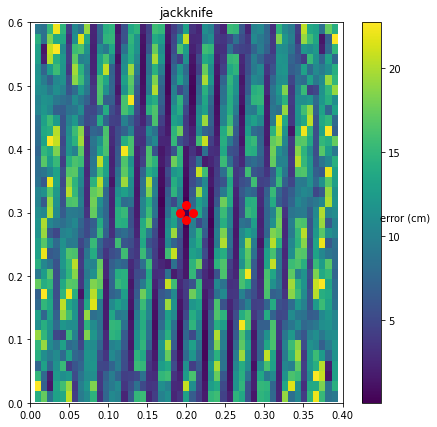

In [31]:
offset = 0.01
x_ary = np.linspace(offset,rd[0]-offset, nx)
y_ary = np.linspace(offset,rd[1]-offset, ny)

x,y = np.meshgrid(x_ary, y_ary)
fig, ax = plt.subplots(figsize=(7,7))
c = ax.pcolormesh(x,y,hm_data.T*100, cmap='viridis')
ax.set_xlim(0, rd[0]), ax.set_ylim(0, rd[1])
cbar = plt.colorbar(c)
cbar.ax.set_ylabel('error (cm)', rotation=0)
plt.plot(mic_pos[:,0],mic_pos[:,1], 'o', color='r', markersize=8)
plt.title('jackknife')
plt.show()


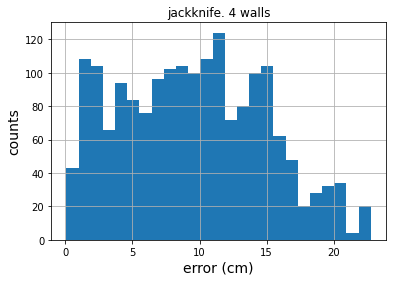

In [32]:
# Histogram: 
plt.figure()
plt.hist(hm_data.flatten()*100, 25)
plt.xlabel('error (cm)',fontsize=14)
plt.ylabel('counts',fontsize=14)
plt.grid()
# plt.title(r'rot, $\alpha=%1.2f$'%0.96)
# plt.title(r'rot, $\theta=%1.0f^\circ$'%93)
plt.title('jackknife. 4 walls')

plt.show()

### Check missing points

In [5]:
Nall_idx.sort()
Nall_sort = np.array(Nall_idx)
ary = np.arange(1,1813)

In [6]:
miss_val = []
for val in ary:
    if val in Nall_idx:
        pass
    else:
        miss_val.append(val)

In [10]:
# miss_val

In [15]:
np.where(np.diff(np.array(Nall_idx))!=1)

(array([ 495,  803, 1224]),)

### Show the mic positions from the selected mic indices

microphone indices

In [11]:
# idx = np.array([498, 619, 807, 1268]) # 4 mics, 2kHz sine
idx = np.array([656, 862, 1000, 1001, 1298]) # 5 mics, gerbils-warble
# data = np.load('output/result_1813_1268_498.npy', allow_pickle=True)
# data = np.load('mp_test_result_4.npy', allow_pickle=True)

Nall

In [16]:
x_dim, y_dim = 1.83, 2.44
rd = np.array([x_dim, y_dim, 0.76]) # room_dimensions
nx, ny = 37, 49
offset = 0.1
Nall = np.array(np.meshgrid(np.arange(nx), np.arange(ny))).T.reshape(-1,2)
x_ary = np.linspace(offset,rd[0]-offset, nx)
y_ary = np.linspace(offset,rd[1]-offset, ny)

Nall indices to mic_pos

In [13]:
def get_mic_pos(idxs, Nall, x_ary, y_ary):
    pos = np.zeros([idxs.shape[0], 2])
    for i,idx in enumerate(idxs):
        pos[i,:] = np.array([x_ary[Nall[idx,0]], y_ary[Nall[idx,1]]])
    
    return pos

In [14]:
mic_pos = get_mic_pos(idx, Nall, x_ary, y_ary)

In [15]:
mic_pos

array([[0.68861111, 0.98666667],
       [0.86972222, 1.45333333],
       [1.00555556, 1.03333333],
       [1.00555556, 1.08      ],
       [1.27722222, 1.22      ]])

#### Get Nall indices from the coordinate positions

In [20]:
def mic_pos_to_Nall_idx(mic_pos, x_ary,y_ary,Nall):
     Nall_idx = []
     for i in range(mic_pos.shape[0]):
          # loop over n_mic
          x = mic_pos[i][0]
          y = mic_pos[i][1]
          ary_idx = np.array([np.where(x_ary==x)[0][0], np.where(y_ary==y)[0][0]])
          Nidx = np.where((Nall==ary_idx).all(axis=1))
          Nall_idx = np.append(Nall_idx, Nidx)
     return Nall_idx

In [21]:
mic_pos = np.array([[x_dim-offset, y_dim-offset, 0.86-offset],
                    [offset, y_dim-offset, 0.86-offset],\
                        [x_dim-offset, offset, 0.86-offset],\
                            []])
Nidx = mic_pos_to_Nall_idx(mic_pos, x_ary, y_ary, Nall)

IndexError: invalid index to scalar variable.

In [22]:
# a = mic_pos_to_Nall_idx(data, x_ary, y_ary, Nall)
offset

0.1

### Show the mic position (Plot)

In [72]:
# x = np.linspace(0,10,1000)
# y = np.sin(x)
# x, y = np.linspace(0,x_dim, 100), np.linspace(0,y_dim, 100)

In [17]:
%matplotlib inline

In [71]:
# fig = plt.figure()
# ax = fig.add_axes([1,1,1,1])
# ax.plot(x,y)
# plt.show()
# # fig.savefig('plot_test.png', bbox_inches='tight')
# # plt.close()


In [18]:
mic_pos

array([[0.68861111, 0.98666667],
       [0.86972222, 1.45333333],
       [1.00555556, 1.03333333],
       [1.00555556, 1.08      ],
       [1.27722222, 1.22      ]])

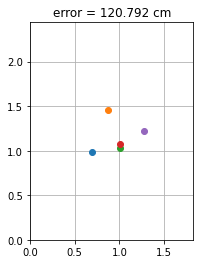

In [19]:
# mic_pos = data[1].T
fig, ax = plt.subplots()
for i in range(mic_pos.shape[0]):
    ax.plot(mic_pos[i,0],mic_pos[i,1], 'o')
    
ax.set_aspect('equal')
ax.set_title('error = %1.3f cm'%(merr*100))
ax.set_xlim(0,x_dim)
ax.set_ylim(0,y_dim)
ax.grid()
plt.show()